# Fundamentals of Machine Learning - Exercise 1b
### Deadline: 27.11.2020, 16:00

- Zhao Sun (Matriculation Number 3630998)
- M.Sc. Scientific Computing, Heidelberg University

In [248]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

## 3 Nearest Neighbor Classification
### 3.1 Exploring the Data (3 points)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
data.dype= float64
data.shape= (1797, 64)
COMMENTS: Size of these images is 8x8


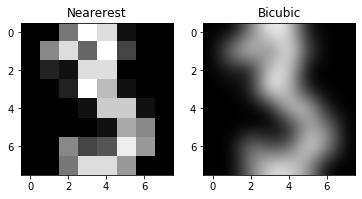

In [24]:
# Load the dataset from sklearn and extract the data:

digits = load_digits()
print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]
print('data.dype=',data.dtype)
print('data.shape=',data.shape)
m = int(data.shape[1]**0.5)
print('COMMENTS: Size of these images is {}x{}'.format(m,m))

img = data[3].reshape(m,m)
assert 2 == len(img.shape)
plt.figure()
plt.gray()

plt.subplot(1,2,1)
plt.imshow(img, interpolation ="nearest") # also try interpolation =" bicubic "
plt.title('Nearerest')

plt.subplot(1,2,2)
plt.imshow(img, interpolation ="bicubic") # also try interpolation =" bicubic "
plt.title('Bicubic')

plt.show()

In [138]:
# Moreover, sklearn provides a convenient function to separate the data into a training and a test set.
X_all = data
y_all = target
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, test_size = 0.4, random_state = 0)

# print(np.all(X_all == digits.data),np.all(y_all == digits.target))
print('training set size = {}, test set size = {}'.format(X_train.shape[0],X_test.shape[0]))


training set size = 1078, test set size = 719


(719,)

### 3.2 Distance function computation using loops (3 points)

In [91]:
# Naive implementation of the nearest neighbor classifier using loops

def dist_loop(training, test):
    """
    Computes the Euclidean distance between all instances in the training and test set (in the feature space). 
    Parameters:
    ---------------------------------------
    training: matrix of size N × D
    test: matrix of size M × D 
    where D: pixels per image, N: size of training set, M: size of test set
    
    Return:
    ---------------------------------------
    A distance matrix of size N x M
    """
    # numpy.square(), numpy.sum() and numpy.sqrt() or numpy.linalg.norm()

    N,D = training.shape
    M = test.shape[0]
    dist = np.zeros([N,M])
    
    for i in range(N):
        for j in range(M):
            # dist[i,j] = np.sqrt(np.square(training[i] - test[j]).sum())  # alternatively
            sum = 0
            for k in range(D):
                sum += (training[i,k] - test[j,k])**2
            dist[i,j] = sum ** 0.5
    
    return dist


In [75]:
#a= np.array([[1,0],[0,2],[0,0]])
#b = np.array([[0,2,1],[1,0,0]])
#dist_loop(a,b.T)


3.31 s ± 79.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 3.3 Distance function computation using vectorization (8 points)

In [129]:
def dist_vec(training, test):
    """
    Computes the Euclidean distance between all instances in the training and test set (in the feature space). 
    Parameters:
    ---------------------------------------
    training: matrix of size N × D
    test: matrix of size M × D 
    where D: pixels per image, N: size of training set, M: size of test set
    
    Return:
    ---------------------------------------
    A distance matrix of size N x M
    """

    N = training.shape[0]
    M = test.shape[0]
    dist = np.zeros([N,M])

    for i in range(M):
        dist[:,i] = np.linalg.norm(training - test[i], axis = 1)
    
    return dist 


In [132]:
#a= np.array([[1,0],[0,1],[1,1],[0,0]])
#b = np.array([[0,1,1],[1,0,0]])
#print(dist_vec(a,b.T))
#print(np.all(dist_loop(a,b.T) == dist_vec(a,b.T)))

print("For the naive dist_loop function: ")
%timeit dist_loop(X_train, X_test)

print("\nFor the vectorized dist_vec function: ")
%timeit dist_vec(X_train, X_test)

36.9 s ± 690 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
79.6 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 3.4 Implement the k-nearest neighbor classifier (6 points)

In [200]:
def knn_classifier(k, X_train, y_train, X_test):
    """
    K-nearest neighbour classifier for arbitrary training set size.
    
    params
    ------------------------------------------------
    k: int, number of neighbours to be included in the majority vote
    
    X_train: np.array of size N x D consisting of N training data points each with D features 
    y_train: np.array of size N x 1 consisting of N labels for training data    
    X_test: np.array of size M x D consisting of M test data points each with D features
    
    returns
    -------------------------------------------------
    y_predict: np.array of size M x 1 consisting of predicted class labels for X_test samples
    
    """
    N = X_train.shape[0]
    M = X_test.shape[0]
    y_predict = np.zeros(M)
    
    dist = dist_vec(X_train, X_test) # matrix of N x M
    
    k_indices = dist.argsort(axis = 0)[:k] # choose the top k rows 
    
    for i in range(M):
        # for each test point i
        k_labels = y_train[k_indices[:,i]] 
        # print(i, k_labels)
        labels, counts = np.unique(k_labels,return_counts=True)
        idx = np.argmax(counts)
        y_predict[i] = labels[idx]
    
    return y_predict

# Test
#k = 3
#X_train = np.array([[10,0],[11,0],[12,0],[13,0],[20,1],[21,1],[22,1],[23,1],[24,1]])
#y_train = np.array([0,0,0,0,1,1,1,1,1])
#X_test = np.array([[15,2]])
#knn_classifier(k, X_train, y_train, X_test)

error rates:  [0.0139, 0.0069, 0.0069, 0.0069, 0.0069, 0.0208]
Describe the dependency of the classification performance on k. 
COMMENTS: For small values of k (i.e. k < 15), the error rate decreases with increasing k initially, but for large k values (i.e. k > 15), the error rate increases; the optimal k value is around 5 to 9.


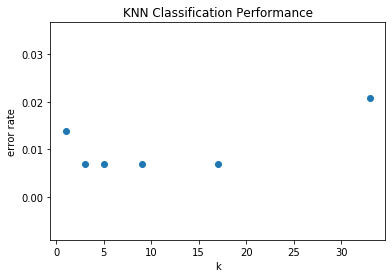

In [223]:
# Filter out digits 3 and 9 from data set:

y_train_39 = np.hstack((y_train[y_train == 3],y_train[y_train == 9]))
X_train_39 = np.vstack((X_train[y_train == 3],X_train[y_train == 9]))

y_test_39 = np.hstack((y_test[y_test == 3],y_test[y_test == 9]))
X_test_39 = np.vstack((X_test[y_test == 3],X_test[y_test == 9]))

#print(y_train.shape, (y_train[y_train == 3]).shape,(y_train[y_train == 9]).shape)
#print(y_train_39.shape, y_train_39)
#print(X_train.shape, (X_train[y_train == 3]).shape,(X_train[y_train == 9]).shape)
#print(X_train_39.shape)

#print(y_test.shape, (y_test[y_test == 3]).shape,(y_test[y_test == 9]).shape)
#print(y_test_39.shape, y_test_39)
#print(X_test.shape, (X_test[y_test == 3]).shape,(X_test[y_test == 9]).shape)
#print(X_test_39.shape)

k_values = [1, 3, 5, 9, 17, 33] 
errors_39 = []
for k in k_values:
    y_predict_39 = knn_classifier(k, X_train_39, y_train_39, X_test_39)
    err = (y_predict_39 != y_test_39).sum() / y_test_39.shape[0]
    errors_39.append(round(err,4))

print("error rates: ", errors_39)
plt.scatter(k_values, errors_39)
plt.title('KNN Classification Performance')
plt.xlabel("k")
plt.ylabel('error rate')

print("Describe the dependency of the classification performance on k. \nCOMMENTS: For small values of k (i.e. k < 15), the error rate decreases with increasing k initially, but for large k values (i.e. k > 15), the error rate increases; the optimal k value is around 5 to 9.")


## 4 Cross-validation (8 points)

In [245]:
def split_folds(data,target,L):
    """
    To randomly split the given data and labels into L folds of roughly equal size
    
    """
    N = data.shape[0]
    idx = np.random.permutation(N)
    X_folds = np.array_split(data[idx],L)
    y_folds = np.array_split(target[idx],L)

    return X_folds, y_folds

#L = 10
#X_folds, y_folds = split_folds(data, target, L)

In [329]:
data_39 = np.vstack((X_train_39,X_test_39))
target_39 = np.hstack((y_train_39,y_test_39))

L_values = [2,5,10]
k_values = [1,5,9,13]

sklearn_L = []
knn_L = []

for L in L_values:
    X_folds, y_folds = split_folds(data_39, target_39, L)
    
    sklearn_k = []
    knn_k = []

    for k in k_values:
        skmodel = KNeighborsClassifier(n_neighbors=k)
        
        errors_sk = []
        errors_knn = []
        
        for i in range(L):
            X_test = X_folds[i]
            y_test = y_folds[i]
            
            X_ = [X_folds[j] for j in range(L) if j!=i]
            X_train = np.vstack(X_)

            y_ = [y_folds[j] for j in range(L) if j!=i]
            y_train = np.hstack(y_)
            
            skmodel.fit(X_train,y_train)
            y_skmodel = skmodel.predict(X_test)
            err_sk = (y_skmodel != y_test).sum() / y_test.shape[0]
            errors_sk.append(err_sk)
            
            y_knn = knn_classifier(k, X_train, y_train, X_test)
            err_knn = (y_knn != y_test).sum() / y_test.shape[0]
            errors_knn.append(err_knn)
        
        sklearn_k.append([np.array(errors_sk).mean(),np.array(errors_sk).std()])
        knn_k.append([np.array(errors_knn).mean(),np.array(errors_knn).std()])
        
    sklearn_L.append(sklearn_k)
    knn_L.append(knn_k)

results = np.array([sklearn_L,knn_L])
results.shape


(2, 3, 4, 2)

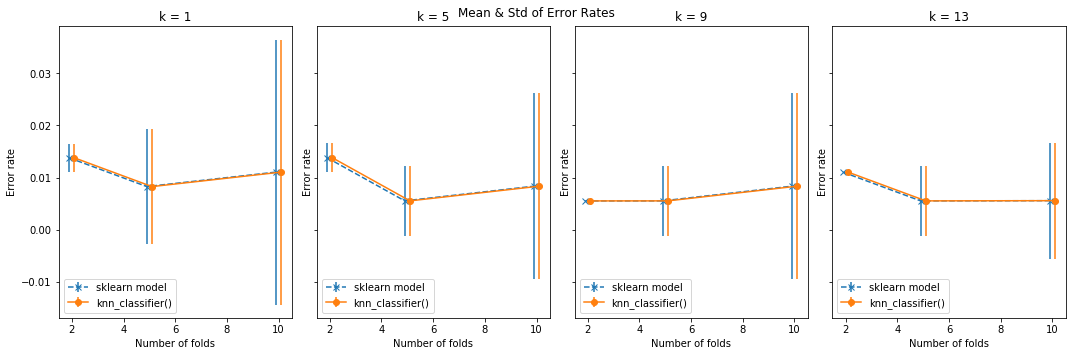

In [330]:
fig, ax = plt.subplots(1, len(k_values), figsize = (15, 5), tight_layout = True, sharey = True, sharex=True)
fig.suptitle("Mean & Std of Error Rates")
for i in range(len(k_values)):
    ax[i].set_title('k = %i' %k_values[i])
    ax[i].set_xlabel("Number of folds")
    ax[i].set_ylabel("Error rate")
    ax[i].errorbar(np.array(L_values)-0.1, results[0,:,i,0], yerr = results[0,:,i,1], fmt = 'x--', label = 'sklearn model')
    ax[i].errorbar(np.array(L_values)+0.1, results[1,:,i,0], yerr = results[1,:,i,1], fmt = 'o-', label = 'knn_classifier()')
    ax[i].legend(loc='lower left')
fig.tight_layout()

In [315]:
print("COMMENTS: As L increases, the mean error rate stablises but the standard deviation increases.")


COMMENTS: As L increases, the mean error rate stablises but the standard deviation increases.
